In [10]:
import numpy as np
import matplotlib.pyplot as plt
import scipy.linalg as la
import scipy.integrate as integ
from scipy.spatial import Delaunay
from scipy.integrate import dblquad
import matplotlib.tri as mtri

from plot_triangulation import plot_triangle, plot_mesh
from fem2d_utils import *

# Cuadratura en dos dimensiones

## Ejercicio 1: integrales de funciones de dos variables con `dblquad`

La función `dblquad` permite hacer integrales sobre regiones simples, donde la variable `x` se mueve entre `a` y `b`, y la variable `y` se mueve entre una función inferior `g` y otra superior `h`:

$$
R=\{(x,y):\:a\leq x\leq b,\;g(x)\leq y \leq h(x)\}
$$

![simple region](simple_region.png)


 - Aprende a usar `dblquad` para integrar `f(x,y)=x*y**2` en el cuadrado `[0,2]x[0,1]`.
 - Aprende a usar `dblquad` para integrar la misma función, en el triángulo con vértices `[0,0]`, `[1,0]` y `[1,1]`, usando.
 - Aprende a usar `dblquad` para integrar la misma función, en el triángulo con vértices `[0,0]`, `[1,-1]` y `[2,0]`.

In [3]:
dblquad?

## Ejercicio 2: Cuadratura en triángulos

El sistema anterior tiene una dificultad práctica: si nos dan los vértices del triángulo, a veces tenemos que usar la función superior, a veces la inferior, y escribir las funciones a mano. Una solución es hacer un cambio de variable para llevar el triángulo a un triángulo de referencia. Otra solución más sencilla de implementar es usar un método de cuadratura para triángulos. Además, para el método de elementos finitos, no necesitamos hacer integrales muy precisas sobre los triángulos, porque nuestro método tendrá error de truncamiento del orden de una potencia del mayor diámetro de un triángulo. Si queremos más precisión, podemos usar reglas compuestas sobre una triangulación más fina:

 - Busca en el código de elementos finitos código para calcular el área de un triángulo, conocidos los vértices.
 - Implementa la 'regla del centroide': se aproxima la integral por el área del triángulo multiplicada por el valor de la función en el baricentro del triángulo.
 - Implementa la 'regla de los vértices': se aproxima la integral por el área del triángulo multiplicada por el promedio de la función en los vértices del triángulo.
 - Implementa la 'regla de los puntos medios': se aproxima la integral por el área del triángulo multiplicada por el promedio de la función en los puntos medios de los lados del triángulo.
 - Comprueba para las funciones de abajo, qué métodos las integran exactamente
 - ¿Cuál parece ser el grado de exactitud de cada regla?

In [24]:
def area_triangulo(vs):
    return 

vs = np.array([
    [0,0],
    [1,0],
    [0,1]
])
area_triangulo(vs)

0.5

In [32]:
def quad_baricentro(vs, f):
    return 

def quad_vertices(vs, f):
    return 

def quad_puntos_medios(vs, f):
    return 

def f_const(xy):
    return 1
def f_lin  (xy):
    return xy[0] + xy[1]
def f_cuad (xy):
    return xy[0]*xy[1]
def f_cub  (xy):
    return xy[0]*xy[1]**2 + xy[1]**3
test_funs = [
    f_const, f_lin, f_cuad, f_cub
]
integrales = [
    # Invertimos los argumentos del integrando porque dblquad es así :-/
    dblquad(lambda y,x: f([x,y]), 0, 1, lambda x:0, lambda x:1-x)[0]
    for f in test_funs
]

In [33]:
for quad_fun in [quad_baricentro, quad_vertices, quad_puntos_medios]:
    print('#'*3,quad_fun.__name__)
    for f, int_f in zip(test_funs, integrales):
        print('#'*6, f.__name__, ':',quad_fun(vs, f), '. Integral exacta =',int_f)

### quad_baricentro
###### f_const : None . Integral exacta = 0.5
###### f_lin : None . Integral exacta = 0.3333333333333333
###### f_cuad : None . Integral exacta = 0.04166666666666667
###### f_cub : None . Integral exacta = 0.06666666666666667
### quad_vertices
###### f_const : None . Integral exacta = 0.5
###### f_lin : None . Integral exacta = 0.3333333333333333
###### f_cuad : None . Integral exacta = 0.04166666666666667
###### f_cub : None . Integral exacta = 0.06666666666666667
### quad_puntos_medios
###### f_const : None . Integral exacta = 0.5
###### f_lin : None . Integral exacta = 0.3333333333333333
###### f_cuad : None . Integral exacta = 0.04166666666666667
###### f_cub : None . Integral exacta = 0.06666666666666667


## Ejercicio 3: cuadratura compuesta 2D

Implementa la regla de cuadratura de los vértices compuesta, usando una triangulación de un dominio.

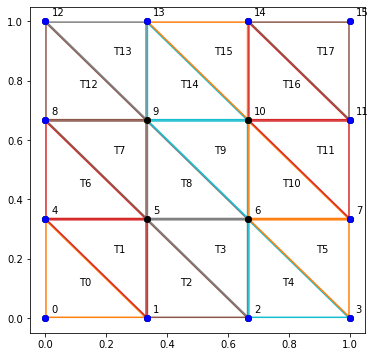

In [29]:
vertices, ivertices_boundary, triangles = square_mesh(3, L=1)
plt.figure(figsize=(6,6))
plot_mesh(vertices,ivertices_boundary,triangles)

In [34]:

def quad_vertices_compuesta(vertices, triangles, f):
    return 

integrales = [
    dblquad(lambda y,x: f([x,y]), 0, 1, lambda x:0, lambda x:1)[0]
    for f in test_funs
]

for f, int_f in zip(test_funs, integrales):
    print(f.__name__, ':',quad_vertices_compuesta(vertices, triangles, f), '. Integral exacta =',int_f)

f_const : None . Integral exacta = 1.0
f_lin : None . Integral exacta = 1.0
f_cuad : None . Integral exacta = 0.24999999999999997
f_cub : None . Integral exacta = 0.41666666666666663
